# Predicting Car Prices


## Data Set Information

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year

Data is from  [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile)

## Introduction to Data

In [100]:
import pandas as pd
import numpy as np

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)


In [101]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [102]:
### Select only the columns with continuous values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [103]:
numeric_cars.head()


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning


In [104]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [105]:
# replacing ? values in normalized_losses with Nan

numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars['normalized-losses'].isnull().sum()
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [106]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [107]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [108]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

# Confirm that there's no more missing values!
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [109]:
#normalize all values except price column
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col


In [110]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate k-nearest neighbors Model

{'normalized-losses': [9280.94986710108,
  6961.106163204347,
  7627.705962288315,
  7465.485034880281,
  7720.068716566579],
 'wheel-base': [4627.561273136604,
  5121.630694446549,
  5465.236829414088,
  5507.5301610837805,
  5752.08271403299],
 'length': [5169.802314431087,
  5215.57978375828,
  5419.972211210776,
  5300.668415477293,
  5381.824915148057],
 'width': [4718.212860189694,
  4616.675183893205,
  4619.368133208157,
  4599.589728952111,
  4654.512440739093],
 'height': [7745.61191262447,
  8041.040589866264,
  7592.144534847831,
  7720.696298574056,
  7718.878210213232],
 'curb-weight': [5520.943644230783,
  5038.26321442437,
  4410.7577852337345,
  4367.457694896477,
  4631.20477413208],
 'engine-size': [3201.3594590640105,
  2835.030228999319,
  3271.2013993711125,
  3609.823267842287,
  3724.2100786361966],
 'bore': [9618.718150121935,
  7454.3205773985255,
  6760.26377750056,
  7153.355786558693,
  6762.907113292993],
 'stroke': [7096.410249953392,
  7397.3090224335865

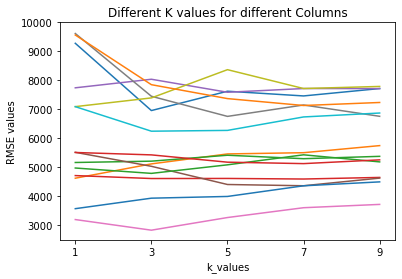

In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def knn_train_test(feature, target, df, k):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    knn = KNeighborsRegressor(n_neighbors =k)
    
    # Fit model using k nearest neighbors.
    knn.fit(train_df[[feature]], train_df[target])
    
    predictions = knn.predict(test_df[[feature]])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target], predictions)
    
    rmse = mse**(1/2)
    return rmse

k_values = [1,3,5,7,9]
columns_k_values = {}


# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary columns_k_values and return a plot
for col in range(14):
    temp = []
    for i in k_values:
        temp.append(knn_train_test(numeric_cars.columns[col], 'price', numeric_cars, i))
    
    columns_k_values[numeric_cars.columns[col]] = temp
    
    plt.plot(k_values, temp, label = numeric_cars.columns[col])
    plt.title('Different K values for different Columns')
    plt.xlabel('k_values')
    plt.ylabel('RMSE values')
    plt.xticks(k_values)
    plt.ylim(ymax= 10000, ymin = 2500)
    #plt.legend()
    #plt.show()

columns_k_values



In [112]:
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
# column names and average RMSE values 

average_values = {}
for key, value in columns_k_values.items():
    average_values[key] = np.mean(value)
    
rmse_results_series = pd.Series(average_values)
rmse_results_series.sort_values(inplace=True)
rmse_results_series


engine-size          3328.324887
horsepower           4076.233834
width                4641.671669
curb-weight          4793.725423
city-mpg             5097.581440
wheel-base           5294.808334
length               5297.569528
highway-mpg          5303.818305
compression-rate     6647.668952
bore                 7549.913081
stroke               7675.790929
height               7763.674309
normalized-losses    7811.063149
peak-rpm             7833.873154
dtype: float64

## Multivariate Model

In [113]:
#run previous function with different number of features
#use best features calculated in the previous step
#k value will be set to default 5

def knn_train_test_features(features, target, df, k):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    
    knn = KNeighborsRegressor(n_neighbors =k)
    
    # Fit model using k nearest neighbors.
    knn.fit(train_df[features], train_df[target])
    
    predictions = knn.predict(test_df[features])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target], predictions)
    
    rmse = np.sqrt(mse)
    return rmse


varied_features = {}
for nr_best_feats in range(1,9):
    varied_features['{} best features'.format(nr_best_feats)] = {5: knn_train_test_features(
        rmse_results_series[:nr_best_feats].index.tolist(),
        'price',
        numeric_cars , 5
    ) }
varied_features


{'1 best features': {5: 3271.2013993711125},
 '2 best features': {5: 2955.187607386625},
 '3 best features': {5: 3567.456573132758},
 '4 best features': {5: 3487.563298747749},
 '5 best features': {5: 3360.832156381264},
 '6 best features': {5: 3667.4622629683636},
 '7 best features': {5: 3637.842892933031},
 '8 best features': {5: 3646.6933902339856}}

Best RMSE value is achieved with 4 features. 
Columns are:
- highway-mpg 
- engine-size  
- horsepower
- city-mpg 

## Hyperparameter Tuning

Now let's calculate best k value for different number of features

In [114]:
varied_parameter = {}
   
for nr_best_feats in range(2,6):
    temp = {}
    for k in range(1,26):
        
        temp[k] = knn_train_test_features(
        rmse_results_series[:nr_best_feats].index.tolist(),
        'price',
        numeric_cars , k)
    varied_parameter['{} best features'.format(nr_best_feats)] = temp
varied_parameter

{'2 best features': {1: 2450.2738763874804,
  2: 2661.9987126292162,
  3: 2793.550528548849,
  4: 2864.739225449104,
  5: 2955.187607386625,
  6: 3051.3008413228326,
  7: 3161.8029926093677,
  8: 3447.870716189476,
  9: 3788.4717994509742,
  10: 4076.9610506254326,
  11: 4185.068696931529,
  12: 4287.774725087223,
  13: 4379.380419432107,
  14: 4422.510853684792,
  15: 4532.435214548731,
  16: 4681.2635642500345,
  17: 4735.980331009335,
  18: 4790.924284707802,
  19: 4842.8352741445615,
  20: 4839.872589219291,
  21: 4839.343451354248,
  22: 4828.464675627526,
  23: 4860.8210277333355,
  24: 4902.3076518997805,
  25: 4965.027757512669},
 '3 best features': {1: 3312.80766028748,
  2: 3496.1531741796916,
  3: 3339.0545523591495,
  4: 3359.448815514147,
  5: 3567.456573132758,
  6: 3719.8643263478903,
  7: 3645.5786538155767,
  8: 3744.921304333344,
  9: 3984.367185540151,
  10: 3994.924521449587,
  11: 4127.333398712259,
  12: 4272.235062338452,
  13: 4348.726710239621,
  14: 4325.58581

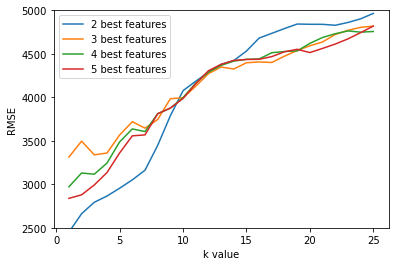

In [118]:
for k,v in varied_parameter.items():
        
    plt.plot(v.keys(), v.values(), label="{}".format(k))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.ylim(ymax= 5000, ymin = 2500)
    plt.legend()
    #plt.show()
